# MODEL TRAINING AND EVALUATION

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA



In [94]:
# load data
df = pd.read_csv('tmdb_movies_data_preprocessed.csv')

In [95]:
# Seperate the data into features and target variable

X = df.drop('revenue_adj', axis=1)
y = df['revenue_adj']


# PCA

Explained Variance Ratio for PC1: 0.3571
Explained Variance Ratio for PC2: 0.1484
Explained Variance Ratio for PC3: 0.1045
Explained Variance Ratio for PC4: 0.0892
Explained Variance Ratio for PC5: 0.0863
Explained Variance Ratio for PC6: 0.0777
Explained Variance Ratio for PC7: 0.0564
Explained Variance Ratio for PC8: 0.0392
Explained Variance Ratio for PC9: 0.0254
Explained Variance Ratio for PC10: 0.0137
Explained Variance Ratio for PC11: 0.0022
Cumulative Explained Variance: 1.0000


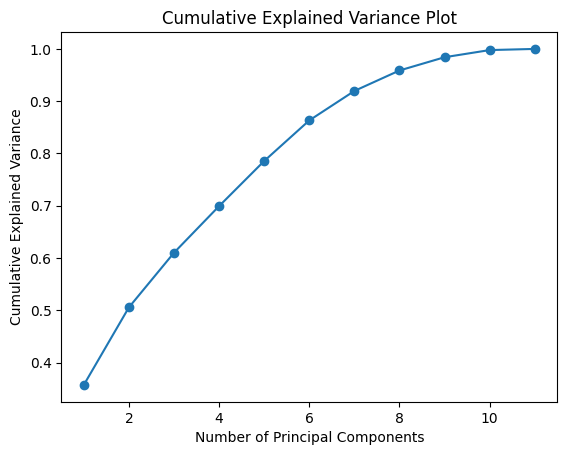

In [48]:
# # Initialize PCA
# pca = PCA()

# # Fit and transform the standardized features
# X_pca = pca.fit_transform(X_scaled)

# # Create a DataFrame for the principal components
# columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
# df_pca = pd.DataFrame(data=X_pca, columns=columns)

# # Display the explained variance ratio for each principal component
# explained_variance_ratio = pca.explained_variance_ratio_
# for i, ratio in enumerate(explained_variance_ratio):
#     print(f'Explained Variance Ratio for PC{i+1}: {ratio:.4f}')

# # Display the cumulative explained variance
# cumulative_explained_variance = explained_variance_ratio.cumsum()
# print(f'Cumulative Explained Variance: {cumulative_explained_variance[-1]:.4f}')

# # Optionally, you can visualize the cumulative explained variance plot
# import matplotlib.pyplot as plt

# plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance Plot')
# plt.show()


# SelectKBest

In [96]:
#Select the top k features using f_regression

k_best = 10
selector = SelectKBest(f_regression, k=k_best)
X_selected_features = selector.fit_transform(X, y)



In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size=0.2, random_state=42)



In [98]:
# Scale the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# RANDOM FOREST REGRESSOR

In [117]:
# Initialization
regressor = RandomForestRegressor(random_state=42)

# Defining the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'n_jobs': [-1]
}

#GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_scaled, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Training the model with the best hyperparameters
best_regressor = RandomForestRegressor(**best_params, random_state=42)
best_regressor.fit(X_scaled, y_train)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200, 'n_jobs': -1}


RandomForestRegressor(min_samples_leaf=2, n_estimators=200, n_jobs=-1,
                      random_state=42)

SAVING THE TRAINED MODEL

In [118]:
import joblib

# Saving the trained model
model_save_path = 'BEST_RF.joblib'
joblib.dump(best_regressor, model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to BEST_RF.joblib


# LINEAR REGRESSION

In [99]:
linear_regressor = LinearRegression()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, 5, 10],
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_linear = GridSearchCV(linear_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_linear.fit(X_scaled, y_train)

# Get the best hyperparameters
best_params_linear = grid_search_linear.best_params_
print("Best Hyperparameters for Linear Regression:", best_params_linear)

# Train the Linear Regression model with the best hyperparameters
best_linear_regressor = LinearRegression(**best_params_linear)
best_linear_regressor.fit(X_scaled, y_train)




Best Hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None}


LinearRegression()

SAVING THE MODEL

In [100]:
linear_model_save_path = 'BEST_LR.joblib'
joblib.dump(best_linear_regressor, linear_model_save_path)

print(f"Best Linear Regression Model saved to {linear_model_save_path}")

Best Linear Regression Model saved to BEST_LR.joblib


# DECISION TREE REGRESSOR

In [101]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_decision_tree = GridSearchCV(decision_tree_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_decision_tree.fit(X_scaled, y_train)

# Get the best hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_
print("Best Hyperparameters for Decision Tree Regressor:", best_params_decision_tree)

# Train the Decision Tree Regressor with the best hyperparameters
best_decision_tree_regressor = DecisionTreeRegressor(**best_params_decision_tree, random_state=42)
best_decision_tree_regressor.fit(X_scaled, y_train)


Best Hyperparameters for Decision Tree Regressor: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2}


DecisionTreeRegressor(max_depth=20, min_samples_leaf=2, random_state=42)

SAVING THE MODEL

In [102]:
decision_tree_model_save_path = 'BEST_DT.joblib'
joblib.dump(best_decision_tree_regressor, decision_tree_model_save_path)

print(f"Best Decision Tree Regressor Model saved to {decision_tree_model_save_path}")

Best Decision Tree Regressor Model saved to BEST_DT.joblib


# SVM REGRESSOR

In [115]:
# Initialize the SVM Regressor
svm_regressor = SVR()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'kernel': ['rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(svm_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_svm.fit(X_scaled, y_train)

# Get the best hyperparameters
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM Regressor:", best_params_svm)

# Train the SVM Regressor with the best hyperparameters
best_svm_regressor = SVR(**best_params_svm)
best_svm_regressor.fit(X_scaled, y_train)

Best Hyperparameters for SVM Regressor: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}


SVR(C=10, kernel='poly')

SAVING THE MODEL

In [116]:
svm_model_save_path = 'BEST_SVM_R.joblib'
joblib.dump(best_svm_regressor, svm_model_save_path)

print(f"Best SVM Regressor Model saved to {svm_model_save_path}")

Best SVM Regressor Model saved to BEST_SVM_R.joblib


# LASSO REGRESSOR

In [105]:
# Initialize the Lasoo Regressor
lasso_regressor = Lasso()

# Hyperparameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Controls level of regularization
    'tol': [1e-4, 1e-3, 1e-2] # Controls the tolerance for the optimization
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_lasso = GridSearchCV(lasso_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_scaled, y_train)

# Get the best hyperparameters
best_params_lasso = grid_search_lasso.best_params_
print("Best Hyperparameters for Lasso Regressor:", best_params_lasso)

# Train the Lasso regressor with the best hyperparameters
best_lasso_regressor = Lasso(**best_params_lasso)
best_lasso_regressor.fit(X_scaled, y_train)

Best Hyperparameters for Lasso Regressor: {'alpha': 10.0, 'tol': 0.01}


Lasso(alpha=10.0, tol=0.01)

SAVING THE MODEL

In [106]:
lasso_model_save_path = 'BEST_LASSO.joblib'
joblib.dump(best_lasso_regressor, lasso_model_save_path)

print(f"Best Lasso Regressor Model saved to {lasso_model_save_path}")

Best Lasso Regressor Model saved to BEST_LASSO.joblib


# RIGDE REGRESSOR

In [107]:
# Initialize the ridge regressor
ridge_regressor = Ridge()

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],
    'tol': [1e-4, 1e-3, 1e-2]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search_ridge = GridSearchCV(ridge_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_scaled, y_train)

# Get the best hyperparameters
best_params_ridge = grid_search_ridge.best_params_
print("Best Hyperparameters for Ridge Regressor:", best_params_ridge)

# Train the Ridge regressor with the best hyperparameters
best_ridge_regressor = Ridge(**best_params_ridge)
best_ridge_regressor.fit(X_scaled, y_train)


Best Hyperparameters for Ridge Regressor: {'alpha': 10.0, 'tol': 0.0001}


Ridge(alpha=10.0)

SAVING THE MODEL

In [108]:
ridge_model_save_path = 'BEST_RIDGE.joblib'
joblib.dump(best_ridge_regressor, ridge_model_save_path)

print(f"Best Ridge Regressor Model saved to {ridge_model_save_path}")

Best Ridge Regressor Model saved to BEST_RIDGE.joblib


# LOADING THE MODELS FOR PREDICTION ON TEST 

In [119]:
decision_tree_model = joblib.load('BEST_DT.joblib')
linear_model = joblib.load('BEST_LR.joblib')
random_forest_model = joblib.load('BEST_RF.joblib')
svm_model = joblib.load('BEST_SVM_R.joblib')
lasso_model = joblib.load('BEST_LASSO.joblib')
ridge_model = joblib.load('BEST_RIDGE.joblib')

In [120]:
# make predictions
y_pred_dt = decision_tree_model.predict(X_test_scaled)
y_pred_lr = linear_model.predict(X_test_scaled)
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# print predictions
print(y_pred_dt)
print(y_pred_lr)
print(y_pred_rf)
print(y_pred_svm)
print(y_pred_lasso)
print(y_pred_ridge)

[1.38490996e+08 1.02125718e+07 0.00000000e+00 ... 0.00000000e+00
 3.09282436e+07 6.58783631e-02]
[ 1.08387995e+08 -2.33820992e+07  2.55807048e+06 ... -2.48174353e+06
  2.66160675e+07 -2.97327897e+06]
[1.35433940e+08 1.01865987e+07 0.00000000e+00 ... 0.00000000e+00
 2.97521255e+07 0.00000000e+00]
[38890.25968244  5543.77972182  2725.62199069 ...  1853.26780641
  4010.00864218  2291.0439354 ]
[ 1.08388182e+08 -2.33819845e+07  2.55809233e+06 ... -2.48177346e+06
  2.66161175e+07 -2.97325791e+06]
[ 1.09911506e+08 -2.18922225e+07  2.72866725e+06 ... -2.80832609e+06
  2.65716147e+07 -3.05845552e+06]


# EVALUATING THE MODELS' PERFORMANCES

In [121]:
import pandas as pd

# Define the models and their corresponding predictions
models = {
    'Decision Tree Regressor': (decision_tree_model, y_pred_dt),
    'Linear Regression': (linear_model, y_pred_lr),
    'Random Forest Regressor': (random_forest_model, y_pred_rf),
    'SVM Regressor': (svm_model, y_pred_svm),
    'Lasso Regressor': (lasso_model, y_pred_lasso),
    'Ridge Regressor': (ridge_model, y_pred_ridge)
}

# Iterate over the models and print the performance metrics
for model_name, (model, y_pred) in models.items():
    print(model_name)
    print('Accuracy score: {0:.4f}'.format(model.score(X_test_scaled, y_test)))
    print("MAE:", mean_absolute_error(y_test, y_pred)/1000000000)
    print("R2:", r2_score(y_test, y_pred))
    print("\n")

    



Decision Tree Regressor
Accuracy score: 0.9655
MAE: 0.004120467386920755
R2: 0.9655297357260564


Linear Regression
Accuracy score: 0.9163
MAE: 0.015509918410779986
R2: 0.9162683818372892


Random Forest Regressor
Accuracy score: 0.9539
MAE: 0.0027260844509036522
R2: 0.9538672755056233


SVM Regressor
Accuracy score: -0.0925
MAE: 0.05363558791254443
R2: -0.09253108875963423


Lasso Regressor
Accuracy score: 0.9163
MAE: 0.015509900631699889
R2: 0.9162686372732164


Ridge Regressor
Accuracy score: 0.9188
MAE: 0.015403717979005652
R2: 0.9187742830177872




In [125]:
# create a table of the results
results = pd.DataFrame(columns=['Model', 'Accuracy Score', 'MAE', 'R2'])

for model_name, (model, y_pred) in models.items():
    results = pd.concat([results, pd.DataFrame({'Model': [model_name],
                                                'Accuracy Score': [model.score(X_test_scaled, y_test)],
                                                'MAE': [mean_absolute_error(y_test, y_pred)/1000000000],
                                                'R2': [r2_score(y_test, y_pred)]})], ignore_index=True)
    
results

C:\Users\Akshat Pandey\AppData\Local\Temp\ipykernel_2008\3550746371.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Model': [model_name],


,Model,Accuracy Score,MAE,R2
0,Decision Tree Regressor,0.965530,0.004120,0.965530
1,Linear Regression,0.916268,0.015510,0.916268
2,Random Forest Regressor,0.953867,0.002726,0.953867
3,SVM Regressor,-0.092531,0.053636,-0.092531
4,Lasso Regressor,0.916269,0.015510,0.916269
5,Ridge Regressor,0.918774,0.015404,0.918774


# COMPARING THE MODELS USING BOX PLOT 

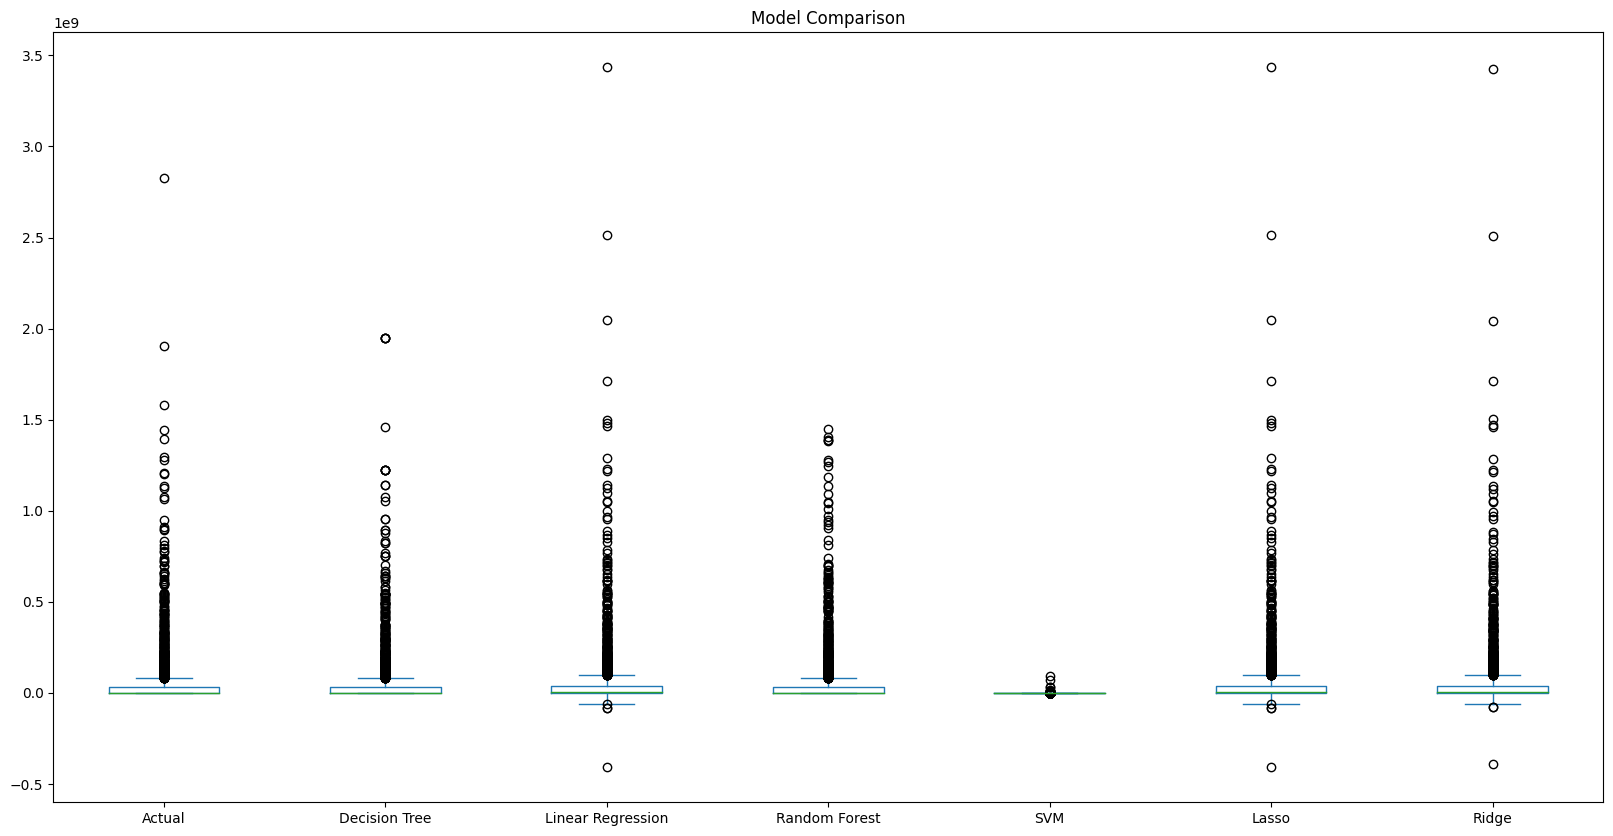

In [123]:
# compare the models

df_results = pd.DataFrame({'Actual': y_test, 'Decision Tree': y_pred_dt, 'Linear Regression': y_pred_lr, 'Random Forest': y_pred_rf, 'SVM': y_pred_svm, 'Lasso': y_pred_lasso, 'Ridge': y_pred_ridge})
df_results.head(10)

# plot the results
df_results.plot(figsize=(20, 10), kind='box', title='Model Comparison')
plt.show()
